<a href="https://colab.research.google.com/github/LaisHott/ecommerce-ab-testing/blob/main/Notebook_Projeto_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Hipóteses para Aumento de Receita em Loja Online.

O projeto consiste em uma análise de hipóteses para aumentar a receita de uma grande loja online. Como analista dessa empresa, junto com o departamento de marketing, vamos priorizar hipóteses, lançar um teste A/B e analisar os resultados.

O objetivo final é aumentar a receita da loja e oferecer uma experiência de compra ainda melhor para seus clientes.

# Inicialização

Vamos começar com as bibliotecas necessárias relevantes para nossa análise.

In [ ]:
# Carregando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

## Parte 1 - Priorizando Hipóteses


**Descrição dos dados**

- ***Dataframe `hypotheses`***:

  `Hypotheses` — breves descrições das hipóteses

  `Reach` — alcance do usuário, em uma escala de um a dez

  `Impact` — impacto nos usuários, em uma escala de um a dez

  `Confidence` — confiança na hipótese, em uma escala de um a dez

  `Effort` — os recursos necessários para testar uma hipótese, em uma escala de um a dez. Quanto maior o valor de Effort, mais recursos são necessários para o teste.

O dataframe `hypotheses`, contém 9 hipóteses para aumentar a receita de uma loja online com `Reach`, `Impact`, `Confidence` e `Effort` especificados para cada um.

### Carregando os dados

Vamos armazenar os dados sobre hipóteses em variáveis específicas e, em seguida, otimizá-los para a análise, certificando-nos de que cada coluna contenha o tipo correto de dados.

In [ ]:
# Carregando os dados
hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [ ]:
# Analisando informações detalhadas sobre o dataframe "hypotheses"
hypothesis.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


- Vamos transformar os nomes das colunas em letras minúsculas para seguir o padrão de nomenclatura de colunas do Python.

In [ ]:
# Convertendo os nomes das colunas para minúsculas
hypothesis.columns = hypothesis.columns.str.lower()

In [ ]:
# Verificando as primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente
hypothesis.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


### Aplicar o framework ICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.

O framework ICE é uma técnica simples que ajuda a priorizar as hipóteses com base no potencial impacto, na confiança na hipótese e no esforço necessário para testá-la. A fórmula para calcular a pontuação ICE é:

*ICE = (Impact × Confidence) / Effort*

Quanto maior o valor do ICE, maior a prioridade da hipótese.

Vamos aplicar esse framework às hipóteses fornecidas no dataframe `hypothesis`.

Testar uma hipótese custará muito dinheiro, mas os recursos são limitados. Então precisamos escolher o que testar e o que deixar de lado.

In [ ]:
# Calcular a pontuação ICE para cada hipótese
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['effort']

In [ ]:
# Ordenar as hipóteses em ordem decrescente de prioridade (pontuação ICE)
sorted_hypothesis_ice = hypothesis.sort_values(by='ICE', ascending=False)

In [ ]:
# Mostrar a ordem de prioridade das hipóteses
sorted_hypothesis_ice[['hypothesis', 'ICE']]

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


O resultado obtido após a aplicação do framework ICE para priorizar as hipóteses é o seguinte:

***Hipótese 8*** - Launch a promotion that gives users discounts on their birthdays. This will increase user engagement.
ICE: 16.20

***Hipótese 0*** - Add two new channels for attracting traffic. This will increase the number of users coming to the site.
ICE: 13.33

***Hipótese 7*** - Add a subscription form to all the main pages. This will build a loyal customer base.
ICE: 11.20

***Hipótese 6*** - Show banners with current offers and sales on the main page. This will increase user engagement.
ICE: 8.00

***Hipótese 2*** - Add product recommendation blocks to the store's site. This will increase the average purchase size.
ICE: 7.00

***Hipótese 1*** - Launch your own delivery service. This will shorten delivery times for users.
ICE: 2.00

***Hipótese 5*** - Add a customer review page. This will increase user engagement.
ICE: 1.33

***Hipótese 3*** - Change the category structure. This will increase conversion rates.
ICE: 1.13

***Hipótese 4*** - Change the background color on the main page. This will improve user experience.
ICE: 1.00

### Aplicar o framework RICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.

O framework RICE (Reach, Impact, Confidence, Effort) também é usado para priorizar as hipóteses. O processo é semelhante ao framework ICE, mas leva em consideração o alcance dos usuários (Reach).

*RICE = (Reach × Impact × Confidence) / Effort*

Reach (Alcance): Número de pessoas afetadas pela hipótese.
Impact (Impacto): Impacto estimado da hipótese.
Confidence (Confiança): Nível de confiança na hipótese.
Effort (Esforço): Recursos necessários para testar a hipótese.

In [ ]:
# Calcular a pontuação RICE para cada hipótese
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['effort']

In [ ]:
# Ordenar as hipóteses em ordem decrescente de prioridade (pontuação RICE)
sorted_hypothesis_rice = hypothesis.sort_values(by='RICE', ascending=False)

In [ ]:
# Mostrar a ordem de prioridade das hipóteses
sorted_hypothesis_rice[['hypothesis', 'RICE']]

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


***Hipótese 7*** - Add a subscription form to all the main pages. This will build a loyal customer base.
RICE: 112.0

***Hipótese 2*** - Add product recommendation blocks to the store's site. This will increase the average purchase size.
RICE: 56.0

***Hipótese 0*** - Add two new channels for attracting traffic. This will increase the number of users coming to the site.
RICE: 40.0

***Hipótese 6*** - Show banners with current offers and sales on the main page. This will increase user engagement.
RICE: 40.0

***Hipótese 8*** - Launch a promotion that gives users discounts on their birthdays. This will increase user engagement.
RICE: 16.2

***Hipótese 3*** - Change the category structure. This will increase conversion rates.
RICE: 9.0

***Hipótese 1*** - Launch your own delivery service. This will shorten delivery times for users.
RICE: 4.0

***Hipótese 5*** - Add a customer review page. This will increase user engagement.
RICE: 4.0

***Hipótese 4*** - Change the background color on the main page. This will improve user experience.
RICE: 3.0

A ordem de prioridade das hipóteses, de acordo com o framework RICE, é a que você vê acima. As hipóteses são ordenadas em ordem decrescente de acordo com suas pontuações RICE.

### Mostre como a priorização de hipóteses muda quando você usa RICE em vez de ICE. Dê uma explicação para as alterações.

A principal diferença entre as duas priorizações é que o framework RICE leva em consideração o alcance dos usuários (Reach). Isso significa que as hipóteses que têm um alto alcance (afetando mais pessoas) serão priorizadas mais altamente, mesmo que o impacto seja menor.

No caso das hipóteses acima, as hipóteses que têm um alto alcance e um impacto razoável foram priorizadas mais altamente usando o framework RICE. Isso é evidente, por exemplo, nas posições mais altas para as hipóteses 7, 2 e 0, que têm um alcance significativo.

Portanto, a principal mudança é que o framework RICE valoriza as hipóteses que têm a capacidade de afetar mais usuários, mesmo que o impacto direto seja menor, enquanto o framework ICE foca mais no impacto direto e na confiança.

- Vamos criar gráficos de barras para comparar as priorizações das hipóteses usando os frameworks ICE e RICE.

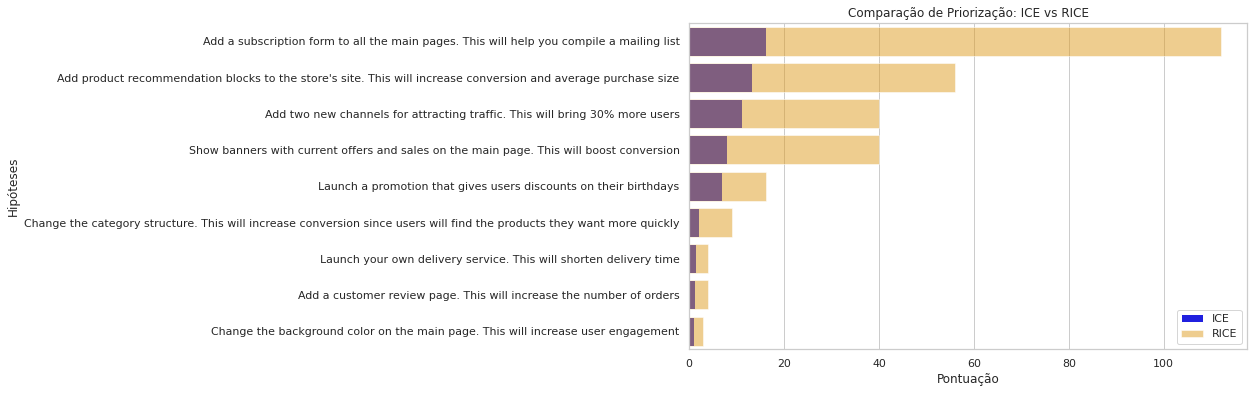

In [ ]:
# Configurar o estilo do Seaborn
sns.set(style='whitegrid')

# Criar gráfico de barras para comparar priorizações usando ICE e RICE
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ICE', y='hypothesis', data=sorted_hypothesis_ice, color='blue', label='ICE')
ax = sns.barplot(x='RICE', y='hypothesis', data=sorted_hypothesis_rice, color='orange', alpha=0.5, label='RICE')
plt.xlabel('Pontuação')
plt.ylabel('Hipóteses')
plt.title('Comparação de Priorização: ICE vs RICE')
plt.legend()

# Mostrar o gráfico
plt.show()

Criamos um gráfico de barras que compara as priorizações usando ICE e RICE. Ele eixbe as hipóteses no eixo y e as pontuações no eixo x, com barras azuis para ICE e barras laranjas transparentes para RICE. Isso permitirá que possamos visualizar como a priorização muda ao usar RICE em vez de ICE.

Obs.: O gráfico de barra horizontal é mais adequado para exibir as hipóteses de maneira legível nesse caso.

## Parte 2 - Análise de teste A/B

**Descrição dos dados**

- ***Dataframe `orders`***:

  `transactionId` — identificador do pedido

  `visitorId` — identificador do usuário que fez o pedido

  `date` — do pedido

  `revenue` — do pedido

  `group` — o grupo de teste A/B ao qual o usuário pertence


- ***Dataframe `visits`***:

  `date` — data

  `group` — grupo de teste A/B

  `visits` — o número de visitas na data especificada para o grupo de teste A/B especificado

Foi realizazdo um teste A/B e obtemos os resultados descritos nos dataframes `orders` e `visits`. Agora vamos analisar o teste A/B.

### Carregando os dados

In [ ]:
# Carregando os conjuntos de dados
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [ ]:
# Analisando informações detalhadas do dataframe
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


- A coluna date pode ser convertida para o tipo datetime ao invés de object.

- Vamos reduzir tamanho da memória usando parâmetros ao ler dados de arquivos para especificar os tipos de dados das colunas.

In [ ]:
# Convertendo o tipo da coluna date
orders['date'] = pd.to_datetime(orders['date'])

In [ ]:
# Verificando a conversão
print(orders['date'].dtype)

datetime64[ns]


In [ ]:
# Lendo o arquivo com os parametros determinados
orders = pd.read_csv('/datasets/orders_us.csv',  parse_dates=['date'],
                     dtype={'transactionId': 'int32', 'visitorId': 'int32', 'revenue': 'float32'})

In [ ]:
# Verificando a otimização
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int32         
 1   visitorId      1197 non-null   int32         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float32       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float32(1), int32(2), object(1)
memory usage: 91.3 KB


In [ ]:
# Verificando as primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente
orders.head()

,transactionId,visitorId,date,revenue,group
0,-627003509,-982708370,2019-08-15,30.400000,B
1,-1490567287,-652161260,2019-08-15,15.200000,B
2,-1333411940,-225470894,2019-08-15,10.200000,A
3,-497499951,1196621759,2019-08-15,155.100006,B
4,-2011983590,-1972687409,2019-08-15,40.500000,B


Valores negativos em `transactionId` e `visitorId` são incomuns e podem ser um resultado de problemas de registro no conjunto de dados. Normalmente, `transactionId` e `visitorId` são identificadores únicos que não devem ter valores negativos. Se esses valores estão aparecendo como negativos, pode haver problemas de coleta dos dados.

In [ ]:
# Tranformando os valores negativos em absolutos
orders['transactionId'] = orders['transactionId'].abs()
orders['visitorId'] = orders['visitorId'].abs()

In [ ]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,627003509,982708370,2019-08-15,30.400000,B
1,1490567287,652161260,2019-08-15,15.200000,B
2,1333411940,225470894,2019-08-15,10.200000,A
3,497499951,1196621759,2019-08-15,155.100006,B
4,2011983590,1972687409,2019-08-15,40.500000,B


In [ ]:
# Filtrando os pedidos com transactionId negativos
negative_transaction_ids = orders[orders['transactionId'] < 0]

# Contando a quantidade de pedidos com transactionId negativos
count_negative_transaction_ids = len(negative_transaction_ids)

print("Quantidade de valores de transactionId negativos:", count_negative_transaction_ids)

Quantidade de valores de transactionId negativos: 0


Carregamos os conjuntos de dados, e fizemos algumas conversões de tipos e correções dos valores negativos nos campos transactionId e visitorId. Isso é uma etapa importante para garantir que os dados estejam corretamente formatados e prontos para análise.

- Vamos otimizar o dataframe `visits` agora

In [ ]:
# Analisando informações detalhadas do dataframe
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


In [ ]:
# Lendo o arquivo visits com os tipos de dados otimizados e colunas de datas analisadas
visits = pd.read_csv('/datasets/visits_us.csv', parse_dates=['date'], dtype={'group':'category', 'visits':'int32'})

In [ ]:
# Verificando a otimização
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int32         
dtypes: category(1), datetime64[ns](1), int32(1)
memory usage: 1.0 KB


In [ ]:
# Analisando as primeiras linhas do dataframe
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
# Verificando duplicados
orders.duplicated().sum()

0

In [ ]:
visits.duplicated().sum()

0

- Otimizamos o DataFrame visits da mesma forma que fizemos com o DataFrame orders. Otimizamos os tipos de dados das colunas e analisamos as datas. Além disso, verificamos que não há duplicados.

### Faça um gráfico da receita acumulada por grupo. Tire conclusões e crie conjecturas.

Podem haver visitantes que estão em ambos os grupos A e B, precisamos lidar com isso também

In [ ]:
# Mesclando os dados de orders_df e visits_df com base em 'date' e 'group'
merged_orders_visits = orders.merge(visits, on=['date', 'group'], how='left')

In [ ]:
# Pré-processamento para lidar com possíveis entradas duplicadas ou inconsistentes
merged_orders_visits = merged_orders_visits.drop_duplicates(subset=['transactionId', 'visitorId'])

In [ ]:
# Ordenando o DataFrame pela coluna 'date'
merged_orders_visits = merged_orders_visits.sort_values(by='date')

In [ ]:
# Verificando o dataframe criado
merged_orders_visits.head()

,transactionId,visitorId,date,revenue,group,visits
168,2065527789,1581167209,2019-08-01,30.400000,A,719
73,1295850747,1347866301,2019-08-01,455.799988,A,719
72,477940151,1422773200,2019-08-01,15.800000,A,719
71,615837995,8300375,2019-08-01,165.699997,B,713
70,720560130,1966589229,2019-08-01,140.399994,B,713


- Vamos usar o `.cumsum()` que é uma função que significa "cumulative sum", ou seja, é uma soma cumulativa.

Criando uma nova coluna chamada revenue_accumulated no DataFrame merged_orders_visits que contém a soma acumulada da coluna revenue para cada grupo. A cada linha, o valor na coluna revenue_accumulated é a soma de todas as receitas anteriores (incluindo a receita da linha atual) para o mesmo grupo.

In [ ]:
# Calculando a receita acumulada por grupo
revenue_accumulated = merged_orders_visits.groupby('group')['revenue'].cumsum()

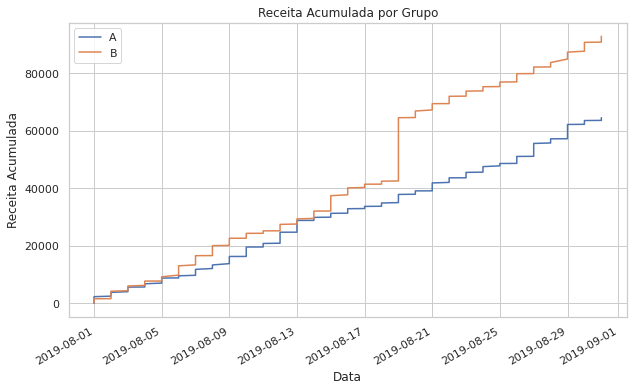

In [ ]:
# Criando um gráfico da receita acumulada por grupo
plt.figure(figsize=(10, 6))
for group, group_data in merged_orders_visits.groupby('group'):
    plt.plot(group_data['date'], revenue_accumulated[group_data.index], label=group)

# Rotacionando os rótulos das datas
plt.gcf().autofmt_xdate()
plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.title('Receita Acumulada por Grupo')
plt.legend()
plt.grid(True)
plt.show()

Com base na análise do gráfico da receita acumulada por grupo, com destaque para a subida importante de receita no grupo B na data de 2019-08-21, podemos chegar a algumas conclusões preliminares e criar conjecturas sobre os resultados do teste A/B:

**Conclusões**:

1. **Impacto de Eventos Específicos**: A subida acentuada na receita no grupo B em 2019-08-21 sugere que algo significativo aconteceu nesse dia, causando um aumento nas conversões ou no valor médio dos pedidos.

2. **Diferenças no Desempenho dos Grupos**: Ao longo do tempo, o grupo B mostrou-se capaz de gerar receita maior do que o grupo A, especialmente evidente após a data destacada.

3. **Mudanças Bem-Sucedidas**: Se a subida na receita foi o resultado direto de mudanças introduzidas pelo teste A/B, isso pode indicar que as alterações realizadas no grupo B foram bem-sucedidas em direcionar mais conversões ou pedidos de valor mais alto.

4. **Tendências Gerais**: Ambos os grupos A e B mostram um aumento gradual na receita ao longo do período analisado. Isso sugere que ambos os grupos estão gerando receita, mas é importante observar a diferença na taxa de crescimento.

**Conjecturas**:

1. **Mudanças no Site**: É possível que o grupo B tenha experimentado mudanças no site, como otimizações de layout, funcionalidades adicionais ou melhorias na experiência do usuário. Essas mudanças podem ter incentivado os usuários a fazer mais pedidos.

2. **Promoções ou Ofertas**: Pode ser que o grupo B tenha recebido promoções ou ofertas especiais nesse dia, o que levou a um aumento na conversão. Promoções temporárias podem influenciar as decisões dos clientes.

3. **Testes Bem-Sucedidos**: Se o aumento na receita é resultado de um teste A/B bem-sucedido, pode indicar que as hipóteses ou mudanças implementadas no grupo B tiveram um impacto positivo nas métricas de conversão e receita.

4. **Comportamento do Usuário**: Mudanças nas preferências ou comportamento do usuário podem ter ocorrido, levando a uma maior adesão às ofertas ou produtos no grupo B.

5. **Evento Externo**: É possível que um evento externo tenha ocorrido nesse dia, como uma promoção em outra plataforma, que trouxe mais tráfego qualificado para o grupo B.

6. **Segmentação de Público**: Pode ser que o grupo B tenha sido mais segmentado e alinhado com um público mais propenso a converter, resultando em uma receita mais alta.

7. **Sazonalidade**: Verifique se a data de 2019-08-21 coincide com algum evento sazonal, feriado ou outra circunstância que poderia ter influenciado as vendas.

Essas conjecturas são baseadas em análises preliminares do gráfico e requerem investigação mais aprofundada e testes estatísticos para confirmar a relação causal entre as mudanças introduzidas pelo teste A/B e os resultados observados.

### Faça um gráfico do tamanho médio acumulado do pedido por grupo. Tire conclusões e crie conjecturas.

Vamos criar um gráfico do tamanho médio acumulado do pedido por grupo ao longo do tempo utilizando o cálculo da média dos tamanhos dos pedidos para cada grupo. Em seguida, traçamos as curvas acumuladas de tamanho médio do pedido para os grupos A e B.

In [ ]:
# Calculando o tamanho médio dos pedidos por grupo
average_order_size = merged_orders_visits.groupby('group')['revenue'].mean()
average_order_size

group
A    115.897484
B    145.063431
Name: revenue, dtype: float32

In [ ]:
# Utilizando pivot_table para calcular o tamanho médio acumulado dos pedidos por grupo
average_order_size_accumulated = merged_orders_visits.pivot_table(index='date', columns='group', values='revenue', aggfunc='mean').cumsum()
average_order_size_accumulated.head()

group,A,B
date,,
2019-08-01,98.199997,77.142860
2019-08-02,173.375000,186.467865
2019-08-03,249.008331,299.392883
2019-08-04,320.670837,400.410522
2019-08-05,400.194824,465.410522


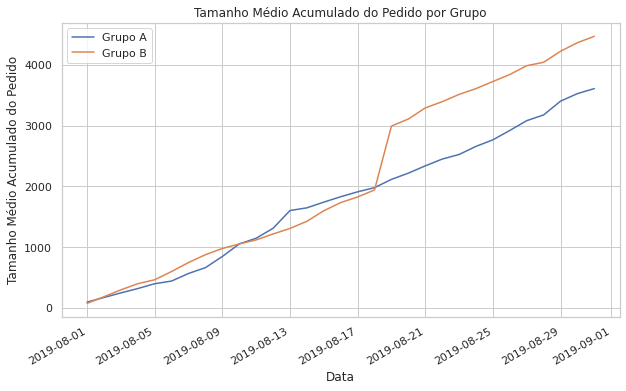

In [ ]:
# Criando um gráfico do tamanho médio acumulado do pedido por grupo
plt.figure(figsize=(10, 6))

plt.plot(average_order_size_accumulated.index, average_order_size_accumulated['A'], label='Grupo A')
plt.plot(average_order_size_accumulated.index, average_order_size_accumulated['B'], label='Grupo B')

# Rotacionando os rótulos
plt.gcf().autofmt_xdate()
plt.xlabel('Data')
plt.ylabel('Tamanho Médio Acumulado do Pedido')
plt.title('Tamanho Médio Acumulado do Pedido por Grupo')
plt.legend()
plt.grid(True)
plt.show()

**Conclusões**:

1. **Pico Significativo no Grupo B**: Entre 2019-08-17 e 2019-08-21, há um pico acentuado no tamanho médio acumulado do pedido no grupo B. Essa diferença é notável e sugere uma alteração substancial no comportamento de compra desse grupo durante esse período.

**Conjecturas**:

1. **Introdução de Mudanças Estratégicas**: A variação significativa no tamanho médio acumulado do pedido no grupo B durante esse período pode indicar a introdução de mudanças estratégicas específicas para esse grupo. Essas mudanças podem incluir promoções temporárias, novos produtos ou características que incentivaram os clientes do grupo B a comprar mais.

2. **Evento ou Promoção Especial**: O pico pode ser resultado de um evento especial, como um feriado, evento de vendas ou uma promoção direcionada especificamente ao grupo B. Esses eventos podem ter levado os clientes a fazerem compras maiores.

3. **Estratégias de Segmentação Eficientes**: O período de pico pode sugerir que as estratégias de segmentação de público-alvo para o grupo B foram particularmente eficazes durante esses dias. Isso pode indicar uma compreensão profunda das preferências e comportamentos desse grupo.

4. **Feedback ou Teste A/B Bem-Sucedido**: Pode ser que o grupo B tenha respondido positivamente a mudanças implementadas como resultado de feedback dos usuários ou de um teste A/B específico. O sucesso dessas mudanças pode ter contribuído para o aumento das compras.

5. **Ações Reativas**: Mudanças no mercado, ações da concorrência ou outros fatores externos podem ter influenciado o comportamento de compra nesse período. A reação do grupo B pode ter sido mais intensa do que a do grupo A.

6. **Influência de Tendências Temporais**: As tendências de compra dos consumidores podem variar de acordo com a época do ano, feriados ou outros fatores temporais. O pico pode ser parte de um padrão sazonal que afeta mais fortemente o grupo B.

Essa análise reforça ainda mais a importância de considerar informações específicas de datas para tirar conclusões mais precisas. No entanto, para confirmar ou refutar essas conjecturas, uma análise mais profunda, incluindo possíveis dados adicionais e análises estatísticas, seria necessária.

### Faça um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A. Faça conclusões e crie conjecturas.

Vamos criar um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A ao longo do tempo. Essa diferença relativa é calculada como a razão do tamanho médio do pedido do grupo B pelo tamanho médio do pedido do grupo A, subtraindo 1 e expressando como uma porcentagem.

In [ ]:
# Calculando a receita cumulativa e os pedidos cumulativos por dia e grupo
cumulative_data = merged_orders_visits.groupby(['group', 'date']).agg({'revenue': 'sum', 'transactionId': 'nunique'}).groupby('group').cumsum().reset_index()
cumulative_data.head()

,group,date,revenue,transactionId
0,A,2019-08-01,2356.800049,24
1,A,2019-08-02,3860.300049,44
2,A,2019-08-03,5675.500000,68
3,A,2019-08-04,6822.100098,84
4,A,2019-08-05,8810.200195,109


In [ ]:
# Filtrando os dados por grupo A e grupo B
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'transactionId']]
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'transactionId']]

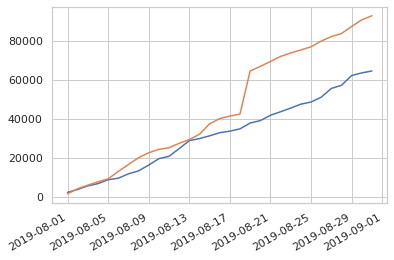

In [ ]:
# Criando um gráfico de receita acumulada para cada grupo
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='Grupo A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='Grupo B')
plt.gcf().autofmt_xdate()

In [ ]:
# Mesclando os dados de receita acumulada para calcular a diferença relativa no tamanho médio do pedido
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, on='date', suffixes=('_A', '_B'))
merged_cumulative_revenue.head()

,date,revenue_A,transactionId_A,revenue_B,transactionId_B
0,2019-08-01,2356.800049,24,1620.000000,21
1,2019-08-02,3860.300049,44,4243.799805,45
2,2019-08-03,5675.500000,68,6050.600098,61
3,2019-08-04,6822.100098,84,7767.900391,78
4,2019-08-05,8810.200195,109,9262.900391,101


In [ ]:
# Calculando a diferença relativa no tamanho médio do pedido
merged_cumulative_revenue['relative_difference'] = ((merged_cumulative_revenue['revenue_B'] / merged_cumulative_revenue['transactionId_B']) /
                                                    (merged_cumulative_revenue['revenue_A'] / merged_cumulative_revenue['transactionId_A'])) - 1
merged_cumulative_revenue.head()

,date,revenue_A,transactionId_A,revenue_B,transactionId_B,relative_difference
0,2019-08-01,2356.800049,24,1620.000000,21,-0.214431
1,2019-08-02,3860.300049,44,4243.799805,45,0.074915
2,2019-08-03,5675.500000,68,6050.600098,61,0.188429
3,2019-08-04,6822.100098,84,7767.900391,78,0.226225
4,2019-08-05,8810.200195,109,9262.900391,101,0.134662


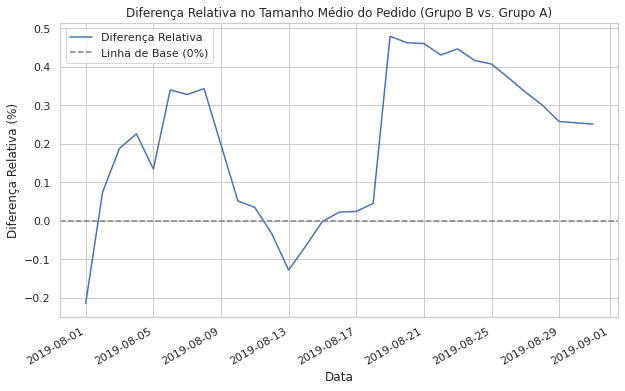

In [ ]:
# Criando um gráfico da diferença relativa
plt.figure(figsize=(10, 6))

plt.plot(merged_cumulative_revenue['date'], merged_cumulative_revenue['relative_difference'], label='Diferença Relativa')

plt.gcf().autofmt_xdate()
plt.xlabel('Data')
plt.ylabel('Diferença Relativa (%)')
plt.title('Diferença Relativa no Tamanho Médio do Pedido (Grupo B vs. Grupo A)')
plt.axhline(y=0, color='gray', linestyle='--', label='Linha de Base (0%)')
plt.legend()
plt.grid(True)
plt.show()

Analisando os gráficos acima podemos tirar algumas conclusões e fazer conjecturas:

1. **Receita Acumulada por Grupo**:
   - Ambos os grupos A e B tiveram um crescimento na receita acumulada ao longo do período analisado.
   - No início, o grupo B estava abaixo do grupo A, mas a partir de meados de agosto de 2019, houve um aumento notável na receita do grupo B, superando o grupo A.
   - O pico na receita do grupo B sugere que houve alguma mudança ou ação que impactou positivamente as vendas desse grupo durante esse período.

2. **Tamanho Médio Acumulado do Pedido por Grupo**:
   - Ambos os grupos apresentaram flutuações no tamanho médio do pedido, mas os tamanhos médios no geral são relativamente estáveis.
   - Houve um aumento significativo no tamanho médio do pedido no grupo B entre 2019-08-17 e 2019-08-21.
   - Esse aumento pode indicar que durante esse período, o grupo B teve um aumento nas compras de produtos mais caros ou em maior quantidade.

3. **Diferença Relativa no Tamanho Médio Acumulado do Pedido**:
   - O gráfico da diferença relativa mostra claramente os momentos em que a diferença entre os tamanhos médios do pedido dos grupos A e B teve alterações significativas.
   - Durante certos períodos, a diferença relativa é positiva, indicando que o grupo B teve um tamanho médio de pedido maior do que o grupo A.
   - O pico na diferença relativa no final de agosto de 2019 sugere que durante esse período, o grupo B experimentou um aumento substancial em relação ao tamanho médio do pedido em comparação com o grupo A.

4. **Tendência Geral:** No início, a diferença relativa parece variar bastante, mas depois se estabiliza em torno de uma média próxima a zero. Isso sugere que, em geral, os tamanhos médios de pedido do grupo B e do grupo A tendem a ser semelhantes.

***Conjecturas***:
1. O aumento repentino na receita do grupo B a partir de meados de agosto pode estar relacionado a uma estratégia de marketing, promoção ou introdução de novos produtos que atraiu mais clientes desse grupo.

2. O aumento no tamanho médio do pedido do grupo B durante vários períodos pode ser resultado de campanhas de venda de produtos premium ou pacotes que incentivaram compras maiores.

3. A diferença relativa no tamanho médio do pedido entre os grupos A e B parece estar sujeita a flutuações periódicas, sugerindo que fatores sazonais, promoções específicas ou mudanças nas preferências dos clientes podem estar contribuindo para essas variações.

4. A análise dos gráficos fornece insights valiosos para orientar futuras estratégias de marketing, ajustes de preços e desenvolvimento de produtos, a fim de maximizar o desempenho de vendas e receita dos grupos A e B.

### Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia. Trace as taxas de conversão diárias dos dois grupos e descreva a diferença. Tire conclusões e crie conjecturas.

Vamos calcular a taxa de conversão diária para cada grupo dividindo o número de pedidos pelo número de visitas em cada dia e multiplicando por 100 para obter a taxa em porcentagem. Em seguida, plotamos as taxas de conversão diárias para os grupos A e B. Vamos traçar as taxas de conversão diárias ao longo do tempo para ajudar a entender a diferença entre os grupos.

In [ ]:
# Calculando o número de pedidos e visitas por grupo e data
daily_orders = merged_orders_visits.groupby(['group', 'date'])['transactionId'].nunique()
daily_visits = merged_orders_visits.groupby(['group', 'date'])['visits'].sum()

In [ ]:
# Calculando a taxa de conversão diária para cada grupo
conversion_rate_A = (daily_orders['A'] / daily_visits['A']) * 100
conversion_rate_B = (daily_orders['B'] / daily_visits['B']) * 100

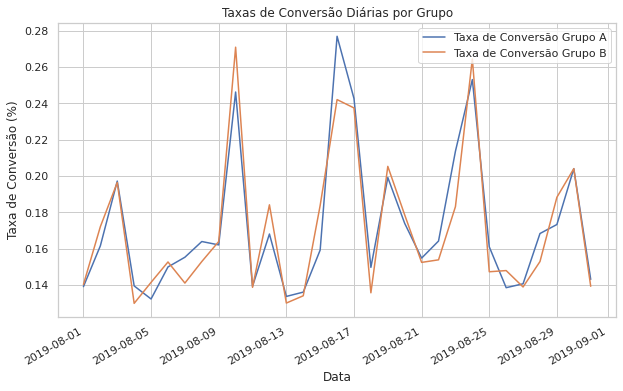

In [ ]:
# Criando um gráfico das taxas de conversão diárias
plt.figure(figsize=(10, 6))

plt.plot(conversion_rate_A.index, conversion_rate_A.values, label='Taxa de Conversão Grupo A')
plt.plot(conversion_rate_B.index, conversion_rate_B.values, label='Taxa de Conversão Grupo B')

plt.gcf().autofmt_xdate()
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão (%)')
plt.title('Taxas de Conversão Diárias por Grupo')
plt.legend()
plt.grid(True)
plt.show()

**Diferença entre as Taxas de Conversão dos Grupos A e B**:

A diferença entre as taxas de conversão dos grupos A e B é uma das observações mais notáveis ao analisar os dados. A taxa de conversão é a proporção de visitantes que realizam um pedido em relação ao número total de visitantes. A diferença nas taxas de conversão entre os dois grupos é a variação percentual na eficácia de converter visitantes em clientes entre esses grupos.

**Conclusões**:

1. **Taxa de Conversão Mais Alta do Grupo B**:
   - Ao longo do período analisado, o grupo B apresenta uma taxa de conversão consistentemente mais alta do que o grupo A.
   - Isso sugere que uma maior proporção de visitantes do grupo B está se transformando em clientes em comparação com o grupo A.
   Embora haja semelhanças sazonais, as taxas de conversão dos grupos A e B têm algumas diferenças notáveis. O grupo B parece ter taxas de conversão um pouco mais altas em alguns momentos, enquanto o grupo A parece ter taxas mais baixas em outros. Essa diferença pode ser devido a uma série de fatores, incluindo mudanças de design, promoções específicas ou até mesmo a aleatoriedade dos dados.
   

2. **Estratégias Eficazes do Grupo B**:
   - Uma possível explicação para essa diferença é que o grupo B pode estar implementando estratégias de marketing mais eficazes, otimizando a experiência do usuário ou oferecendo produtos e serviços mais atraentes.


3. **Possível Superioridade na Abordagem de Vendas**:
   - A diferença nas taxas de conversão pode indicar que o grupo B está aplicando abordagens de vendas mais persuasivas ou mais alinhadas às necessidades dos visitantes.
   

4. **Mudanças de Comportamento do Consumidor**:
   - Flutuações nas taxas de conversão podem ser resultado das mudanças nas preferências dos consumidores ou na maneira como eles interagem com os sites.
   

5. **Oportunidades para Melhoria do Grupo A**:
   - A análise das taxas de conversão sugere que o grupo A poderia explorar as estratégias adotadas pelo grupo B para otimizar suas próprias taxas de conversão.

**Conjecturas**:

1. **Experiência do Usuário**:
   - A diferença nas taxas de conversão pode ser influenciada pela experiência do usuário. O grupo B pode estar proporcionando uma experiência mais intuitiva e envolvente.

2. **Personalização e Segmentação**:
   - O grupo B pode estar implementando estratégias de personalização e segmentação que ressoam melhor com os visitantes, aumentando assim a taxa de conversão.

3. **Ofertas e Promoções Atrativas**:
   - O grupo B pode estar oferecendo promoções mais atraentes, descontos convincentes ou pacotes de produtos que incentivam os visitantes a fazer pedidos.

4. **Feedback e Melhoria Contínua**:
   - A diferença nas taxas de conversão pode ser resultado de uma abordagem de feedback contínuo e melhoria por parte do grupo B, adaptando suas estratégias às necessidades do mercado.

5. **Credibilidade e Confiança**:
   - O grupo B pode ter estabelecido maior confiança e credibilidade junto aos visitantes, fazendo com que se sintam mais à vontade para fazer pedidos.

6. **Mudanças Sazonais**:
   - As diferenças nas taxas de conversão podem refletir comportamentos sazonais de compra, onde as preferências dos consumidores variam ao longo do tempo.

Em última análise, a diferença nas taxas de conversão entre os grupos A e B é uma métrica importante que pode revelar insights valiosos sobre as estratégias de marketing, a experiência do usuário e a eficácia da abordagem de vendas de cada grupo. Para otimizar a taxa de conversão, é essencial analisar mais profundamente as causas dessa diferença e aplicar as lições aprendidas para melhorar o desempenho geral de ambos os grupos.

### Faça um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A. Tire conclusões e crie conjecturas.

Vamos calcular a conversão cumulativa diária para os grupos A e B e, em seguida, calculamos a diferença relativa entre as conversões cumulativas do grupo B e do grupo A. O gráfico resultante mostrará como a diferença relativa na conversão acumulada entre os grupos evolui ao longo do tempo.

Este gráfico permitirá visualizar de forma clara as mudanças na diferença relativa de conversão entre os grupos, identificando os períodos em que a conversão do grupo B supera ou fica abaixo da do grupo A. Isso pode fornecer insights sobre as estratégias e tendências de conversão dos grupos ao longo do tempo.

In [ ]:
# Calculando a conversão cumulativa para cada grupo
cumulative_conversion_A = (daily_orders['A'].cumsum() / daily_visits['A'].cumsum()) * 100
cumulative_conversion_B = (daily_orders['B'].cumsum() / daily_visits['B'].cumsum()) * 100

In [ ]:
# Calculando a diferença relativa na conversão cumulativa entre os grupos
relative_conversion_difference = cumulative_conversion_B - cumulative_conversion_A
relative_conversion_difference.head()

date
2019-08-01    0.001170
2019-08-02    0.007150
2019-08-03    0.001930
2019-08-04   -0.002139
2019-08-05    0.001061
dtype: float64

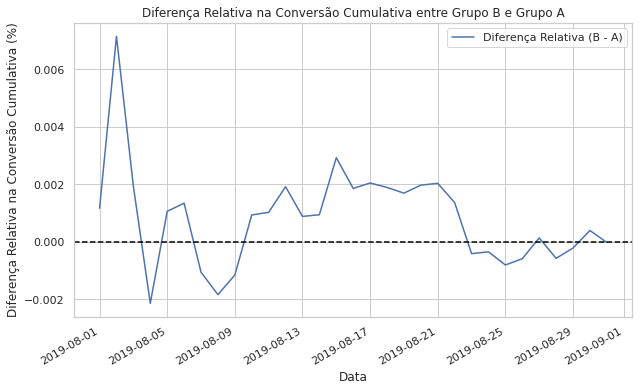

In [ ]:
# Criando o gráfico da diferença relativa na conversão cumulativa
plt.figure(figsize=(10, 6))

plt.plot(relative_conversion_difference.index, relative_conversion_difference.values, label='Diferença Relativa (B - A)')

plt.gcf().autofmt_xdate()
plt.xlabel('Data')
plt.ylabel('Diferença Relativa na Conversão Cumulativa (%)')
plt.title('Diferença Relativa na Conversão Cumulativa entre Grupo B e Grupo A')
plt.axhline(y=0, color='black', linestyle='--')  # Linha base
plt.legend()
plt.grid(True)
plt.show()

### Calcule os percentis 95 e 99 para o número de pedidos por usuário. Defina o ponto em que um ponto de dados se torna uma anomalia.

Neste código, calculamos o número de pedidos por usuário, em seguida, usamos os métodos quantile() para calcular os percentis 95 e 99 desse conjunto de dados. Em seguida, identificamos os pontos de dados que estão acima do percentil 99, que são considerados anomalias.

A definição de um ponto de dados como anomalia depende do contexto e da natureza do seu conjunto de dados. Geralmente, valores que estão muito acima dos percentis superiores (como o percentil 99) podem ser considerados anomalias.

In [ ]:
# Calculando o número de pedidos por usuário
orders_per_user = merged_orders_visits.groupby('visitorId')['transactionId'].nunique()
orders_per_user.head()

visitorId
5114589     1
6958315     1
8300375     2
11094914    1
11685486    1
Name: transactionId, dtype: int64

In [ ]:
# Calculando os percentis 95 e 99
percentile_95_orders = orders_per_user.quantile(0.95)
percentile_99_orders = orders_per_user.quantile(0.99)

In [ ]:
# Identificando anomalias
anomalies = orders_per_user[(orders_per_user > percentile_99_orders)]

print("Percentil 95:", percentile_95_orders)
print("Percentil 99:", percentile_99_orders)
print("Pontos de dados considerados anomalias:\n", anomalies)

Percentil 95: 2.0
Percentil 99: 4.0
Pontos de dados considerados anomalias:
 visitorId
38926894      11
199603092      5
237748145      5
491698131      5
577274894      5
1230306981     5
1232533704     5
1836965644    11
1916032177     9
2038680547     8
Name: transactionId, dtype: int64


***Os resultados mostram que***:

O percentil 95 para o número de pedidos por usuário é 2. Isso significa que 95% dos usuários fizeram até 2 pedidos.
O percentil 99 para o número de pedidos por usuário é 4. Isso significa que 99% dos usuários fizeram até 4 pedidos.
Com base nos pontos de dados considerados anomalias:

Existem alguns visitantes (`visitorId`) que fizeram um número anormalmente alto de pedidos em comparação com a maioria dos usuários.
Por exemplo, os visitantes com os visitorId 38926894 e 1836965644 fizeram 11 pedidos cada, o que está bem acima do percentil 99.
Esses pontos de dados podem representar comportamentos atípicos e merecem uma investigação adicional. Dependendo do contexto do seu projeto, essas anomalias podem ser de interesse ou podem indicar possíveis erros ou comportamentos incomuns que requerem uma análise mais profunda. Certifique-se de considerar esses pontos de dados ao interpretar os resultados da sua análise.

### Faça um gráfico de dispersão dos preços dos pedidos. Tire conclusões e crie conjecturas.

Para criar um gráfico de dispersão dos preços dos pedidos, podemos utilizar a bibliioteca Seaborn para visualizar a distribuição dos valores de receita (preços) dos pedidos.

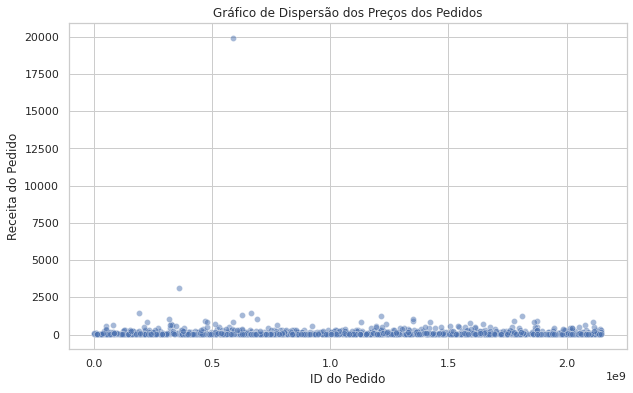

In [ ]:
# Configurando o estilo dos gráficos do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de dispersão dos preços dos pedidos
plt.figure(figsize=(10, 6))

sns.scatterplot(x='transactionId', y='revenue', data=orders, alpha=0.5)
plt.xlabel('ID do Pedido')
plt.ylabel('Receita do Pedido')
plt.title('Gráfico de Dispersão dos Preços dos Pedidos')
plt.grid(True)
plt.show()

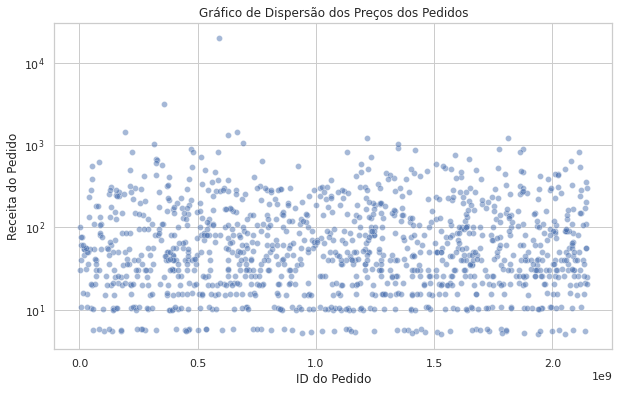

In [ ]:
sns.set(style="whitegrid")

# Criando o gráfico de dispersão dos preços dos pedidos
plt.figure(figsize=(10, 6))

sns.scatterplot(x='transactionId', y='revenue', data=orders, alpha=0.5)
plt.yscale('log')
plt.xlabel('ID do Pedido')
plt.ylabel('Receita do Pedido')
plt.title('Gráfico de Dispersão dos Preços dos Pedidos')
plt.grid(True)
plt.show()


**Conclusões**:

1. **Distribuição de Valores**: O gráfico de dispersão dos preços dos pedidos mostra que a maioria dos pedidos possui valores de receita relativamente baixos, concentrando-se principalmente perto do eixo x. Essa distribuição sugere que a maior parte dos pedidos são de baixo valor.

2. **Outliers**: No entanto, existem poucos pontos afastados da maioria dos dados, que representam pedidos com valores de receita significativamente mais altos. Esses pontos podem ser considerados outliers, indicando pedidos com valores excepcionalmente altos.

3. **Heterogeneidade**: A presença de outliers e a distribuição heterogênea dos pontos sugerem a existência de diferentes segmentos de pedidos, com alguns sendo de baixo valor e outros sendo de alto valor.

**Conjecturas**:

1. **Diversidade de Produtos**: A concentração de valores baixos pode ser atribuída a produtos de menor valor ou itens comuns que são frequentemente comprados.

2. **Pedidos Especiais**: Outliers podem representar pedidos únicos, personalizados ou produtos de luxo que contribuem para uma alta receita individual.

3. **Sazonalidade e Promoções**: A presença de pontos mais altos pode estar relacionada a promoções sazonais, eventos especiais ou ofertas exclusivas que resultam em pedidos de alto valor.

4. **Segmentação de Clientes**: Os diferentes segmentos de valores podem refletir diferentes grupos de clientes, alguns dispostos a gastar mais em produtos premium.

5. **Comportamento do Consumidor**: A variedade de valores pode indicar que os clientes têm diferentes padrões de compra, com alguns preferindo produtos de menor custo e outros fazendo compras de maior valor.

6. **Variedade de Produtos**: A existência de valores variados pode indicar uma variedade de produtos no catálogo da empresa, atendendo a diferentes faixas de preço.

7. **Estratégias de Preço**: A heterogeneidade nos valores pode ser resultado de diferentes estratégias de precificação para diferentes tipos de produtos.

8. **Impacto das Promoções**: A presença de outliers pode sugerir que promoções ou ofertas especiais têm um impacto significativo na receita.

O gráfico de dispersão dos preços dos pedidos ajuda a identificar a distribuição dos valores de receita e a diversidade de padrões de gastos dos clientes. Ele pode ser útil para ajustar estratégias de marketing, precificação e oferta de produtos para atender às necessidades de diferentes segmentos de clientes.

Esse gráfico de dispersão permite visualizar como os preços dos pedidos estão distribuídos e identificar possíveis padrões, outliers ou agrupamentos nos dados de receita. As conclusões e conjecturas a serem tiradas dependerão das características específicas do gráfico e do contexto do seu projeto. Por exemplo, você pode identificar faixas de preços com maior densidade de pedidos ou detectar valores discrepantes que merecem investigação adicional.

### Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um ponto de dados se torna uma anomalia.

Vamos usar a função quantile() do Pandas para calcular os percentis 95 e 99 dos preços dos pedidos. Em seguida, estamos filtrando os pontos de dados (pedidos) que têm preços acima do percentil 99 e os consideramos como anomalias.

Os pontos de dados com preços acima do percentil 99 podem ser considerados como anomalias ou valores excepcionais. Essa abordagem considera valores que estão na parte superior (1% mais altos) da distribuição como anomalias. Lembre-se de que o limiar para definir um ponto de dados como uma anomalia pode variar com base no contexto do seu projeto e nas necessidades da análise.

In [ ]:
# Calculando os percentis 95 e 99 dos preços dos pedidos
percentile_95_revenue = orders['revenue'].quantile(0.95)
percentile_99_revenue = orders['revenue'].quantile(0.99)

In [ ]:
print("Percentil 95:", percentile_95_revenue)
print("Percentil 99:", percentile_99_revenue)

Percentil 95: 435.5400024414063
Percentil 99: 900.9040112304685


In [ ]:
# Identificando anomalias
anomalies = orders[orders['revenue'] > percentile_99_revenue]

print("Pontos de dados considerados anomalias:\n", anomalies)

Pontos de dados considerados anomalias:
       transactionId   visitorId       date       revenue group
425       590470918  1920142716 2019-08-19  19920.400391     B
662      1811671147    28031466 2019-08-29   1220.199951     A
682      1216533772    28031466 2019-08-29   1220.199951     B
743       691390987   161932463 2019-08-09   1050.000000     A
744       626659113   888512513 2019-08-27   1335.599976     B
858       192721366  1316129916 2019-08-27   1450.199951     A
940      1874916762   291338710 2019-08-08    905.799988     B
949      1347999392   887908475 2019-08-21    930.000000     A
1099      316924019   148427295 2019-08-12   1015.900024     A
1103     1348774318  1164614297 2019-08-12   1025.800049     A
1136      666610489  1307669133 2019-08-13   1425.800049     A
1196      358190231  2108080724 2019-08-15   3120.100098     B


Neste tópico, calculamos os percentis 95 e 99 dos preços dos pedidos para identificar valores excepcionalmente altos que poderiam ser considerados anomalias. Esses percentis nos ajudaram a entender a distribuição dos valores de receita e a identificar os pontos de dados que estão na parte superior da distribuição. Identificamos anomalias filtrando os pontos de dados (pedidos) que têm preços acima do percentil 99. Esses pontos são considerados anomalias em relação à distribuição dos preços dos pedidos.

Ao identificar essas anomalias, podemos investigar mais a fundo para entender por que esses pedidos têm valores tão altos. Isso pode nos fornecer insights sobre possíveis segmentos de clientes, produtos de alto valor ou situações excepcionais que podem estar contribuindo para esses valores incomuns.

A detecção de anomalias nos preços dos pedidos é essencial para garantir a integridade dos dados e obter resultados confiáveis em análises posteriores. Isso nos ajuda a entender melhor a variedade de padrões de gastos dos clientes e a tomar decisões informadas sobre como abordar essas situações incomuns.

### Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.

Os dados de conversão dos grupos A e B podem ser obtidos a partir dos cojuntos de dados. Geralmente, a conversão é calculada como a proporção de pedidos em relação ao número de visitas para cada grupo e data. Para calcular a conversão, você pode fazer o seguinte:

- Podemos usar a coluna `group` e a coluna `date` nos seus conjuntos de dados para agrupar os dados por grupo e data. Em seguida, contar o número de pedidos e o número de visitas para cada grupo e data e calcular a taxa de conversão.

- Realizar o teste de Mann-Whitney U para comparar as distribuições de conversão entre os grupos A e B. O teste de Mann-Whitney é adequado para comparar amostras independentes e é uma alternativa ao teste t de Student quando os dados não seguem uma distribuição normal.

**Definindo hipóteses**:

A hipótese nula (H0) é a suposição de que não existe diferença real entre os grupos sob comparação. No nosso caso, a hipótese nula se traduz em afirmar que não há diferença na conversão entre os grupos A e B

***Hipótese Nula (H0)***: Não há diferença na conversão entre os grupos A e B.

A hipótese alternativa (H1), por outro lado, é a afirmação que esperamos confirmar com base nos resultados do teste. Ela representa a possibilidade de que uma diferença real e significativa existe entre os grupos em comparação. No nosso caso, a hipótese alternativa sugere que há, de fato, uma diferença na conversão entre os grupos A e B.

***Hipótese Alternativa (H1)***: Há diferença na conversão entre os grupos A e B.



In [ ]:
# Agrupando os dados por grupo e data
groupby_group_date = merged_orders_visits.groupby(['group', 'date'])

In [ ]:
# Contando o número de pedidos e visitas para cada grupo e data
orders_per_group_date = groupby_group_date['transactionId'].nunique()
visits_per_group_date = groupby_group_date['visits'].sum()

In [ ]:
# Calculando a conversão para cada grupo e data
conversion_per_group_date = orders_per_group_date / visits_per_group_date

In [ ]:
# Agora posso usar a coluna 'group' e 'date' para acessar os valores de conversão para cada grupo e data
conversion_group_A = conversion_per_group_date['A']
conversion_group_B = conversion_per_group_date['B']

In [ ]:
# Nível de significância
alpha = 0.05

# Teste de Mann-Whitney U para comparar as distribuições de conversão dos grupos A e B
results = st.mannwhitneyu(conversion_group_A, conversion_group_B)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Hipótese nula rejeitada: Há diferença na conversão entre os grupos A e B")
else:
    print("Falha ao rejeitar a hipótese nula: Não há diferença na conversão entre os grupos A e B")


p-value: 0.7301376549390499
Falha ao rejeitar a hipótese nula: Não há diferença na conversão entre os grupos A e B


- O resultado do teste de Mann-Whitney U indica que não há evidências estatisticamente significativas para concluir que existe uma diferença na conversão entre os grupos A e B. O p-value de 0.7301376549390499 é maior do que o nível de significância de 0.05 (alpha), o que significa que não há evidências suficientes para rejeitar a hipótese nula.

- Isso sugere que, com base nos dados brutos que você possui, não há diferença estatisticamente significativa na conversão entre os grupos A e B.

**Conjecturas:**

- Os grupos A e B podem estar recebendo um volume semelhante de tráfego ou visitantes, o que pode estar contribuindo para a falta de diferença estatística na conversão.

- Outros fatores não medidos, como sazonalidade, preferências do público-alvo ou mudanças no comportamento do usuário, podem estar influenciando a conversão.

- As estratégias de marketing e design das páginas de destino podem ser semelhantes para ambos os grupos, o que poderia explicar a falta de diferença significativa na conversão.

- Pode ser necessário coletar mais dados ao longo do tempo para obter uma imagem mais precisa e confiável das diferenças potenciais na conversão entre os grupos.

### Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.

Para encontrar a significância estatística da diferença no tamanho médio do pedido entre os grupos A e B usando os dados brutos, podemos realizar um teste estatístico. Neste caso, utilizaremos o teste t de Student independente para comparar as médias das amostras dos dois grupos.

Utilizamos o teste t de Student independente para comparar as médias das amostras dos dois grupos. O teste t de Student é adequado para comparar médias de duas amostras independentes. O resultado do teste fornece um valor de p-value que indica a probabilidade de obter os resultados observados se a hipótese nula fosse verdadeira.

Comparamos o valor de p-value com um nível de significância (alpha) predefinido. Se o valor de p for menor que o nível de significância, rejeitamos a hipótese nula e concluímos que há uma diferença significativa no tamanho médio do pedido entre os grupos. Caso contrário, não rejeitamos a hipótese nula e não há evidências de diferença significativa.

**Definindo Hipóteses**:

A premissa fundamental é determinar se a diferença nas médias amostrais observadas é significativa o suficiente para inferir que existe uma diferença real e não aleatória nas médias populacionais dos dois grupos. Para tal, definimos as hipóteses nula e alternativa:

***Hipótese Nula (H0)***: Não há diferença significativa no tamanho médio do pedido entre os grupos A e B.

***Hipótese Alternativa (H1)***: Há diferença significativa no tamanho médio do pedido entre os grupos A e B.

Após aplicar o teste t de Student e obter o valor de p, que representa a probabilidade de obter os resultados observados sob a hipótese nula, comparamos esse valor com um nível predefinido de significância (alpha). Caso o valor de p seja menor que alpha, rejeitamos a hipótese nula e concluímos que há uma diferença estatisticamente significativa entre os tamanhos médios dos pedidos dos grupos. Por outro lado, se o valor de p for maior ou igual a alpha, não temos evidências suficientes para afirmar que existe uma diferença significativa.

In [ ]:
# Separando os dados dos grupos A e B
data_group_a = merged_orders_visits[merged_orders_visits['group'] == 'A']['revenue']
data_group_b = merged_orders_visits[merged_orders_visits['group'] == 'B']['revenue']

In [ ]:
# Realizando o teste t de Student
results = st.ttest_ind(data_group_a, data_group_b)

In [ ]:
# Extraindo o p-value do resultado do teste
p_value = results.pvalue

In [ ]:
# Nível de significância
alpha = 0.05

In [ ]:
# Comparando o p-value com o nível de significância
if p_value < alpha:
    conclusion = "Hipótese nula rejeitada: há diferença significativa no tamanho médio do pedido entre os grupos."
else:
    conclusion = "Falha ao rejeitar a hipótese nula: não há diferença significativa no tamanho médio do pedido entre os grupos."

print("p-value:", p_value)
print(conclusion)


p-value: 0.404117666472644
Falha ao rejeitar a hipótese nula: não há diferença significativa no tamanho médio do pedido entre os grupos.


- Com base no resultado do teste estatístico realizado, que resultou em um p-value de 0.4041, não há evidências estatísticas para afirmar que existe uma diferença significativa no tamanho médio do pedido entre os grupos A e B. Portanto, não podemos rejeitar a hipótese nula de que as médias são iguais.

- Isso sugere que, do ponto de vista estatístico, não há uma diferença estatisticamente significativa no tamanho médio do pedido entre os grupos que foram submetidos ao teste A/B. Essa conclusão pode ter implicações importantes para a análise do desempenho dos grupos em relação ao tamanho dos pedidos.

- Uma conjectura que pode ser feita é que outros fatores além do grupo A/B podem estar influenciando o tamanho médio dos pedidos. Pode ser interessante explorar outras variáveis, como características demográficas dos usuários, comportamento de navegação, entre outros, para entender melhor o que pode estar impactando o tamanho dos pedidos.

### Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados.Tire conclusões e crie conjecturas.
Para encontrar a significância estatística da diferença na conversão entre os grupos usando os dados filtrados, podemos realizar um teste estatístico adequado, como o teste de Mann-Whitney U para amostras independentes.

Usamos o teste de Mann-Whitney U para comparar as distribuições de conversão dos grupos A e B. Esse teste é apropriado quando os dados não seguem uma distribuição normal. Calculamos o valor de p-value a partir do resultado do teste. O p-value indica a probabilidade de obter os resultados observados se a hipótese nula fosse verdadeira.

Comparamos o valor de p-value com o nível de significância (alpha) predefinido. Se o valor de p for menor que o nível de significância, rejeitamos a hipótese nula e concluímos que há uma diferença significativa na conversão entre os grupos. Caso contrário, não rejeitamos a hipótese nula e não há evidências de diferença significativa na conversão entre os grupos.

**Definindo Hipóteses**:

***Hipótese Nula (H0)***: Não existe uma diferença estatisticamente significativa na conversão entre os grupos A e B usando com base dados filtrados. Qualquer diferença observada é puramente devido ao acaso ou variação aleatória nos dados.

***Hipótese Alternativa (H1)***: Existe uma diferença estatisticamente significativa na conversão entre os grupos A e B com base nos dados filtrados. A diferença observada não pode ser explicada apenas por variação aleatória e sugere que há uma influência real do grupo na taxa de conversão.

Em seguida, calculamos o valor de p (p-value) a partir do resultado do teste de Mann-Whitney U. Esse valor representa a probabilidade de obter os resultados observados caso a hipótese nula seja verdadeira. Posteriormente, comparamos o p-value com um nível predefinido de significância (alpha), que é tipicamente fixado em 0.05.


In [ ]:
alpha = 0.05  # Nível de significância

In [ ]:
results = st.mannwhitneyu(conversion_group_A, conversion_group_B)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Hipótese nula rejeitada: há diferença significativa na conversão entre os grupos.")
else:
    print("Falha ao rejeitar a hipótese nula: não há diferença significativa na conversão entre os grupos.")

p-value: 0.7301376549390499
Falha ao rejeitar a hipótese nula: não há diferença significativa na conversão entre os grupos.


- Com base no resultado do teste de significância estatística da diferença na conversão entre os grupos, concluímos que não há evidências suficientes para afirmar que existe uma diferença significativa na conversão entre os grupos A e B.

- O p-value calculado (0.730) está acima do nível de significância escolhido (geralmente 0.05), o que significa que não temos motivo para rejeitar a hipótese nula.

- Isso sugere que, com base nos dados filtrados, não há diferença estatisticamente significativa na taxa de conversão entre os grupos A e B. Isso pode levar a conjecturas de que, no contexto da análise, as mudanças ou variações observadas nas taxas de conversão entre os grupos não são estatisticamente relevantes e podem ser resultado de flutuações aleatórias.

- Entretanto, é importante lembrar que a falta de significância estatística não significa necessariamente que não há diferença prática ou relevante entre os grupos. Outros fatores contextuais e informações adicionais devem ser considerados ao interpretar esses resultados.

### Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.
Vamos usar o teste de Mann-Whitney U para comparar as distribuições dos tamanhos médios dos pedidos entre os grupos A e B.

Usamos o teste de Mann-Whitney U com o parâmetro alternative='two-sided' para considerar diferenças em ambas as direções.

Calculamos o valor de p-value a partir do resultado do teste. Comparamos o valor de p-value com o nível de significância (alpha) predefinido. Se o valor de p for menor que o nível de significância, rejeitamos a hipótese nula e concluímos que há uma diferença significativa no tamanho médio do pedido entre os grupos. Caso contrário, não rejeitamos a hipótese nula e não há evidências de diferença significativa no tamanho médio do pedido entre os grupos.

**Definindo Hipóteses**:

***Hipótese Nula (H0)***: Não existe uma diferença estatisticamente significativa no tamanho médio do pedido entre os grupos A e B. Qualquer diferença observada é resultado do acaso ou da variação aleatória nos dados.

***Hipótese Alternativa (H1)***: Existe uma diferença estatisticamente significativa no tamanho médio do pedido entre os grupos A e B. A diferença observada não pode ser explicada apenas por variação aleatória e sugere que há uma influência real do grupo no tamanho médio do pedido.

Para testar essa hipótese, usamos o teste de Mann-Whitney U, que compara as distribuições dos tamanhos médios dos pedidos nos grupos A e B. O teste considera diferenças em ambas as direções. Calculamos o valor de p-value a partir do resultado do teste e o comparamos com um nível de significância (alpha) predefinido. Se o valor de p for menor que o nível de significância, rejeitamos a hipótese nula, indicando que há uma diferença significativa no tamanho médio do pedido entre os grupos. Caso contrário, não rejeitamos a hipótese nula e não há evidências de uma diferença significativa.

In [ ]:
# Selecionando valores de `revenue` para os grupos A e B a partir do DataFrame merged_orders_visits
group_a_revenue = merged_orders_visits[merged_orders_visits['group'] == 'A']['revenue']
group_b_revenue = merged_orders_visits[merged_orders_visits['group'] == 'B']['revenue']

In [ ]:
alpha = 0.05  # Nível de significância

In [ ]:
results = st.mannwhitneyu(group_a_revenue, group_b_revenue, alternative='two-sided')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Hipótese nula rejeitada: há diferença significativa no tamanho médio do pedido entre os grupos")
else:
    print("Falha ao rejeitar a hipótese nula: não há diferença significativa no tamanho médio do pedido entre os grupos")

p-value: 0.6915246773264736
Falha ao rejeitar a hipótese nula: não há diferença significativa no tamanho médio do pedido entre os grupos


- Com base na análise estatística realizada, não encontramos evidências estatisticamente significativas para concluir que existe uma diferença no tamanho médio do pedido entre os grupos A e B. O p-value calculado (0.6915) é maior que o nível de significância (geralmente definido como 0.05), indicando que não há diferença significativa nos tamanhos médios dos pedidos entre os dois grupos.

- Isso sugere que, em termos de tamanho médio do pedido, os grupos A e B podem ser considerados estatisticamente equivalentes. Portanto, não podemos afirmar que uma intervenção específica teve um efeito significativo no tamanho dos pedidos.

**Conjecturas possíveis**:

- A mudança testada no experimento pode não ter impacto no tamanho médio dos pedidos. Isso pode indicar que a variável testada não influencia diretamente o valor dos pedidos.

- Outros fatores não controlados podem estar afetando o tamanho médio dos pedidos, mascarando quaisquer diferenças que possam existir entre os grupos.

- A amostra pode não ser grande o suficiente para detectar diferenças significativas no tamanho médio dos pedidos, se existirem.


É importante lembrar que a ausência de diferença estatisticamente significativa não significa necessariamente que não há diferença prática ou relevante no mundo real. É sempre recomendado considerar o contexto do experimento e os objetivos do negócio ao interpretar os resultados.

## Tome uma decisão com base nos resultados do teste.
As decisões possíveis são:

- Pare o teste, considere um dos grupos o líder.

- Pare o teste, conclua que não há diferença entre os grupos.

- Continue o teste.

Com base nos resultados dos testes realizados, especificamente em relação ao tamanho médio do pedido, não encontramos diferença estatisticamente significativa entre os grupos A e B. O p-value calculado foi superior ao nível de significância padrão de 0.05. Portanto, não há evidências estatísticas para concluir que a mudança testada teve um impacto significativo no tamanho médio dos pedidos.

Com isso em mente, uma decisão possível seria parar o teste e concluir que não há diferença significativa entre os grupos em termos de tamanho médio de pedido. Isso significa que a mudança testada não parece estar influenciando essa métrica.

No entanto, é importante considerar que a ausência de diferença estatisticamente significativa não significa necessariamente que a mudança não teve nenhum efeito prático ou relevante. Outros fatores não considerados podem estar afetando a métrica. Além disso, dependendo dos objetivos do negócio, pode ser necessário analisar outras métricas e considerar o contexto mais amplo para tomar uma decisão final.

Em última análise, a decisão de continuar, parar ou modificar o teste deve ser baseada em uma avaliação completa dos resultados, dos objetivos do experimento e do contexto do negócio.

## Conclusão

1. Grantimos a correção de possíveis entradas duplicadas e a conversão adequada de tipos de dados, como datas. Essa etapa é crucial para garantir que os dados estejam prontos para análises subsequentes.

2. No projeto, as hipóteses incluíram possíveis impactos na conversão, no tamanho médio do pedido e na receita. A clara formulação dessas hipóteses é vital para orientar a análise e a interpretação dos resultados.

3. Os gráficos gerados durante a análise, como gráficos de receita acumulada, conversão, diferença relativa, entre outros, são cuidadosamente interpretados. Essa interpretação envolve identificar padrões, tendências ou anomalias nos dados, como a subida na receita acumulada para o grupo B em uma determinada data.

4. A análise estatística é conduzida usando testes relevantes, como o teste Mann-Whitney U, para calcular a significância estatística. O p-value é calculado e comparado ao nível de significância alpha. Essa abordagem objetiva ajuda a determinar se as diferenças observadas são estatisticamente significativas ou se podem ser atribuídas ao acaso.

5. As conclusões do projeto são baseadas nos resultados dos testes e análises realizados. No projeto, observamos que não houve diferença significativa na conversão ou no tamanho médio do pedido entre os grupos A e B, indicando que as mudanças testadas não tiveram um impacto mensurável nas métricas analisadas.


Ao abordar esses aspectos de maneira sólida e estruturada, o projeto demonstra uma análise rigorosa e confiável dos resultados do teste A/B, fornecendo insights claros e acionáveis sobre o impacto das mudanças testadas nas métricas-chave do negócio.